In [19]:
######## .keras file ta offline a hole manualy save korte hobe

# #classification problem

# inputs = Input((28,28))#input layer

# outputs = Dense(number_of_classes, activation = 'softmax')(x) #output layer

# model.compile(loss = 'catagorical crossentropy') #cost function


In [1]:
# MNIST stands for Modified National Institute of Standards and Technology dataset.
# It is one of the most famous datasets in machine learning and deep learning for image classification.

# Key Points:

# What it contains:
# Handwritten digits 0–9 (10 classes).

# Number of samples:
# 60,000 training images
# 10,000 testing images

# Image size:
# Grayscale images
# Shape: 28 × 28 pixels
# Pixel values range from 0 (black) to 255 (white)

# Why it’s popular:
# Small and easy to use
# Standard benchmark for testing classification algorithms
# Often the first dataset people use when learning neural networks

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [5]:

number_of_classes = 10
    
#--- Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [6]:
# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [7]:
# One-hot encode labels
y_train = to_categorical(y_train, number_of_classes)
y_test  = to_categorical(y_test, number_of_classes)

In [8]:
#--- Cross-check data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [9]:
#--- Build the model
inputs = Input((28,28))  # input layer
x = Flatten()(inputs)    # flatten 28x28 → 784
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(number_of_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#--- Train with 10% validation split
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9980 - loss: 0.0059 - val_accuracy: 0.9828 - val_loss: 0.1255
Epoch 2/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9969 - loss: 0.0115 - val_accuracy: 0.9823 - val_loss: 0.1057
Epoch 3/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.9818 - val_loss: 0.1233
Epoch 4/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0097 - val_accuracy: 0.9855 - val_loss: 0.1248
Epoch 5/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9974 - loss: 0.0108 - val_accuracy: 0.9818 - val_loss: 0.1207
Epoch 6/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9977 - loss: 0.0085 - val_accuracy: 0.9817 - val_loss: 0.1224
Epoch 7/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9838 - val_loss: 0.1015
Epoch 8/200
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9985 - loss: 0

In [12]:
#--- Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 98.13%


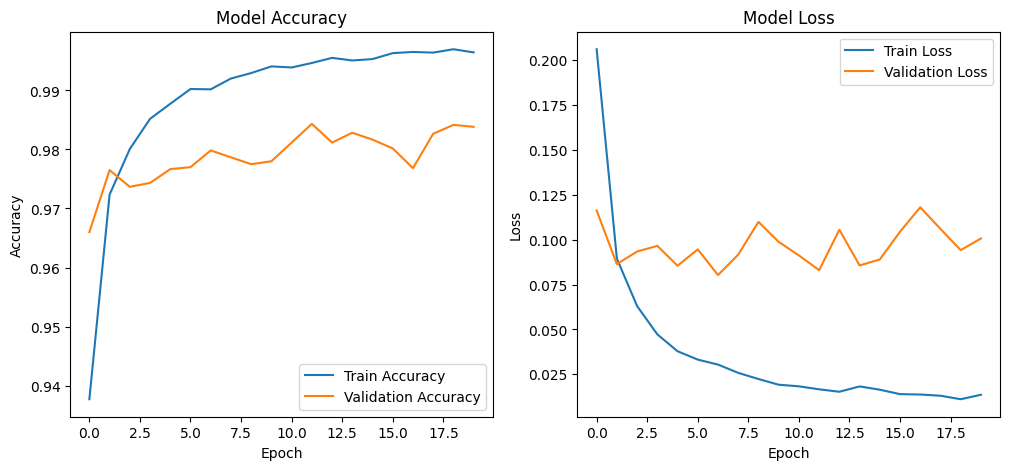

In [13]:
#--- Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()